## Extending to four Component PR EOS

In [11]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rcParams
import numpy as np
import matplotlib.cm as cm # matplotlib's color map library
#rcParams['figure.figsize'] = 18.75, 18.75
from scipy import stats
import seaborn as sns
from scipy.interpolate import griddata
import pr_z_v3 as pr_z
R, mwAir, degF2R = 10.731577089016, 28.97, 459.67

In [85]:
def Zplots(component):
    rcParams['figure.figsize'] = 9, 9

    plt.plot(Zs, calc_Zs, 'o')
    plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
    plt.title(component+' Calculated Z-Factor vs GERG2008')
    plt.xlabel('GERG2008 Z-Factor')
    plt.ylabel('Calculated Z-Factor')
    plt.grid()
    #plt.savefig('co2.png')
    plt.show()
    errs = np.abs(calc_Zs - Zs)/Zs
    print('Average Relative error:',np.mean(errs))
    print('95% of data better than error:', np.percentile(errs, 95))
    
    errs = (calc_Zs - Zs)/Zs
    plt.plot(Zs, errs, 'o')
    plt.title(component+' Relative Error in Calculated Z-Factor')
    plt.xlabel('GERG2008 Z-Factor')
    plt.ylabel('(Calculated-Z - GERG2008-Z)/GERG2008-Z')
    plt.grid()
    plt.ylim(-0.1, 0.1)
    #plt.savefig('rel_co2.png')
    plt.show()
    
    #fig, ax = plt.subplots()
    #res = stats.probplot(errs, plot=ax)
    #ax.set_title('Normal Probability Plot of '+component+' Residuals')
    #ax.set_xlabel('Theoretical Quantiles')
    #ax.set_ylabel('Ordered Values')
    #plt.show()

    x = degfs
    y = psias
    z = errs

    # target grid to interpolate to
    yi = np.arange(15,15000,20)
    xi = np.arange(50, 300, 5)
    xi,yi = np.meshgrid(xi,yi)

    # interpolate
    zi = griddata((x,y), z, (xi,yi),method='linear')

    rcParams['figure.figsize'] = 11, 9
    fig, ax = plt.subplots()
    #c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=zi.min(), vmax=zi.max())
    c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=-0.05, vmax=0.05)
    levels = np.arange(-0.05, 0.06, 0.01)
    CS = ax.contour(xi, yi, zi, levels=levels, linewidths=0.5, colors='k')
    ax.clabel(CS, inline=True, fontsize=10)

    ax.set_title(component+' Relative Error (Zcalc - Z_GERG) / Z_GERG')
    # set the limits of the plot to the limits of the data
    ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
    ax.set_ylabel('psia')
    ax.set_xlabel('degf')
    ax.set_ylim(0, 15000)
    ax.set_xlim(60, 300)
    #ax.set_ylim(0, 15)
    fig.colorbar(c, ax=ax)
    plt.show()
    rcParams['figure.figsize'] = 9, 9

def molar_plots(component):
    rcParams['figure.figsize'] = 9, 9
    v = R*(degfs+degF2R)*Zs/psias
    v_calc = R*(degfs+degF2R)*calc_Zs/psias
    
    plt.plot(v, v_calc, 'o')
    plt.plot([min(v), max(v)], [min(v), max(v)], '--', c='k')
    plt.title(component+' Calculated Molar Volume vs GERG2008')
    plt.xlabel('GERG2008 Molar Volume (ft3/lbmol)')
    plt.ylabel('Calculated Molar Volume (ft3/lbmol)')
    plt.grid()
    #plt.savefig('co2.png')
    plt.show()
    errs = np.abs(v_calc - v)/v
    print('Average Relative error:',np.mean(errs))
    print('95% of data better than error:', np.percentile(errs, 95))
    
    errs = (v_calc - v)/v
    plt.plot(v, errs, 'o')
    plt.title(component+' Relative Error in Calculated Molar Volumes')
    plt.xlabel('GERG2008 ft3/lbmol')
    plt.ylabel('(Calculated-Volume - GERG2008-Volume)/GERG2008-Volume')
    plt.grid()
    plt.ylim(-0.1, 0.1)
    #plt.savefig('rel_co2.png')
    plt.show()

    x = degfs
    y = psias
    z = errs

    # target grid to interpolate to
    yi = np.arange(15,15000,20)
    xi = np.arange(50, 300, 5)
    xi,yi = np.meshgrid(xi,yi)

    # interpolate
    zi = griddata((x,y), z, (xi,yi),method='linear')

    rcParams['figure.figsize'] = 11, 9
    fig, ax = plt.subplots()
    #c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=zi.min(), vmax=zi.max())
    c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=-0.05, vmax=0.05)
    levels = np.arange(-0.05, 0.06, 0.01)
    CS = ax.contour(xi, yi, zi, levels=levels, linewidths=0.5, colors='k')
    ax.clabel(CS, inline=True, fontsize=10)

    ax.set_title(component+' Relative Error (Calculated-Volume - GERG2008-Volume)/GERG2008-Volume')
    # set the limits of the plot to the limits of the data
    ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
    ax.set_ylabel('psia')
    ax.set_xlabel('degf')
    ax.set_ylim(0, 15000)
    ax.set_xlim(60, 300)
    #ax.set_ylim(0, 15)
    fig.colorbar(c, ax=ax)
    plt.show()
    rcParams['figure.figsize'] = 9, 9

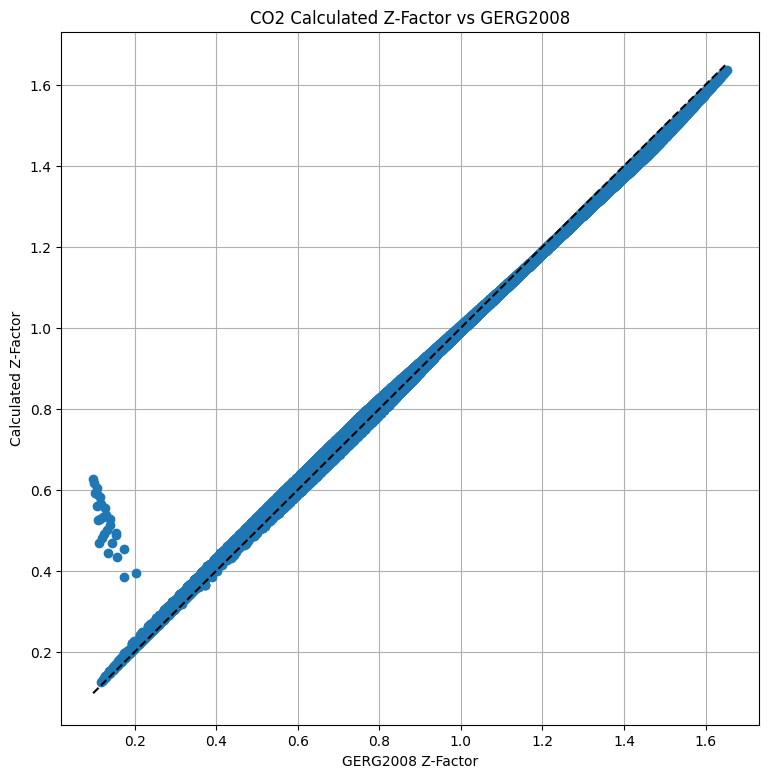

Average Relative error: 0.020660451594918607
95% of data better than error: 0.052488728097279856


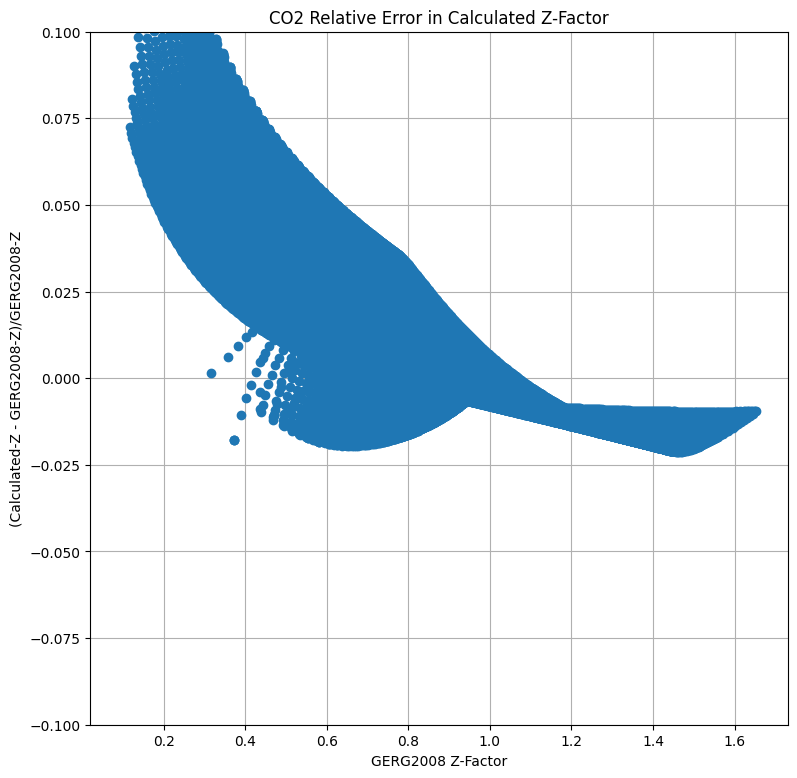

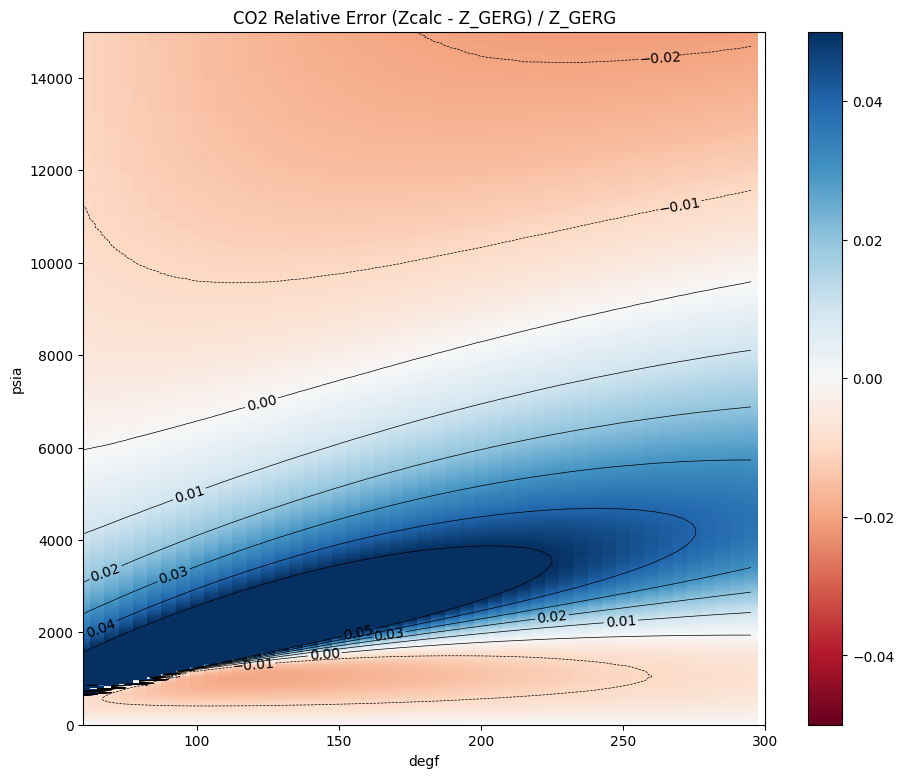

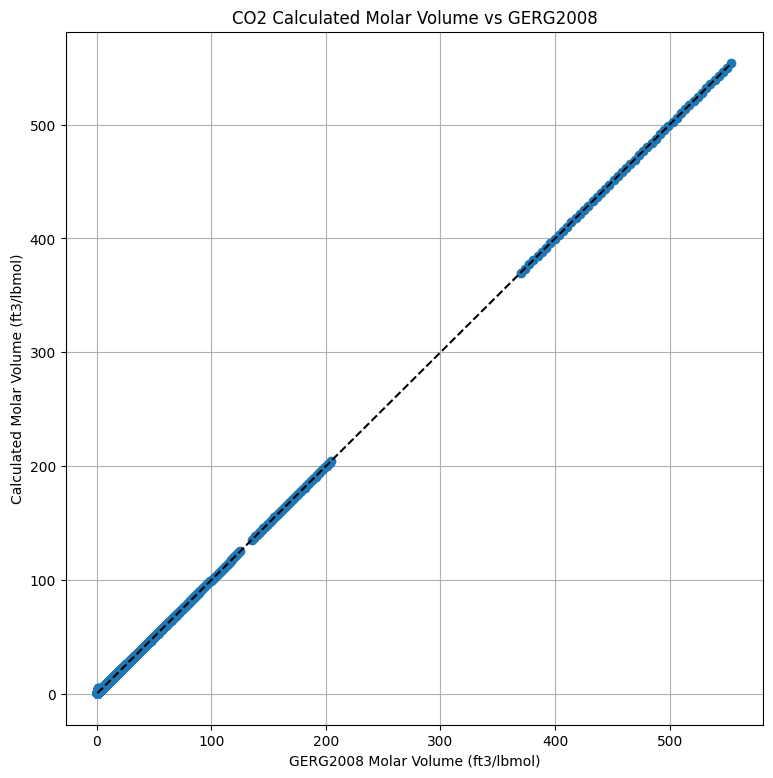

Average Relative error: 0.020660451594918618
95% of data better than error: 0.052488728097279905


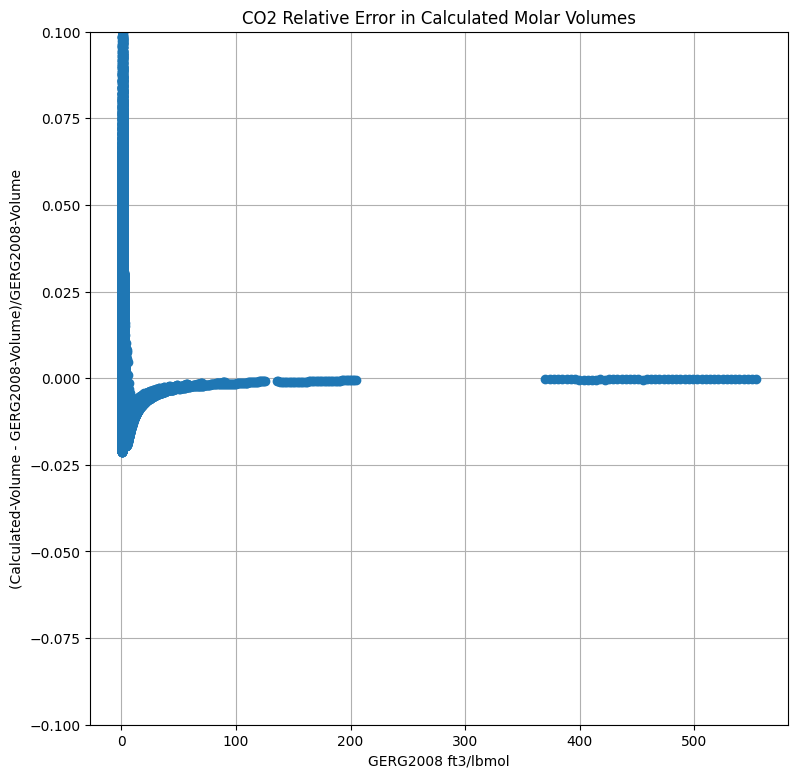

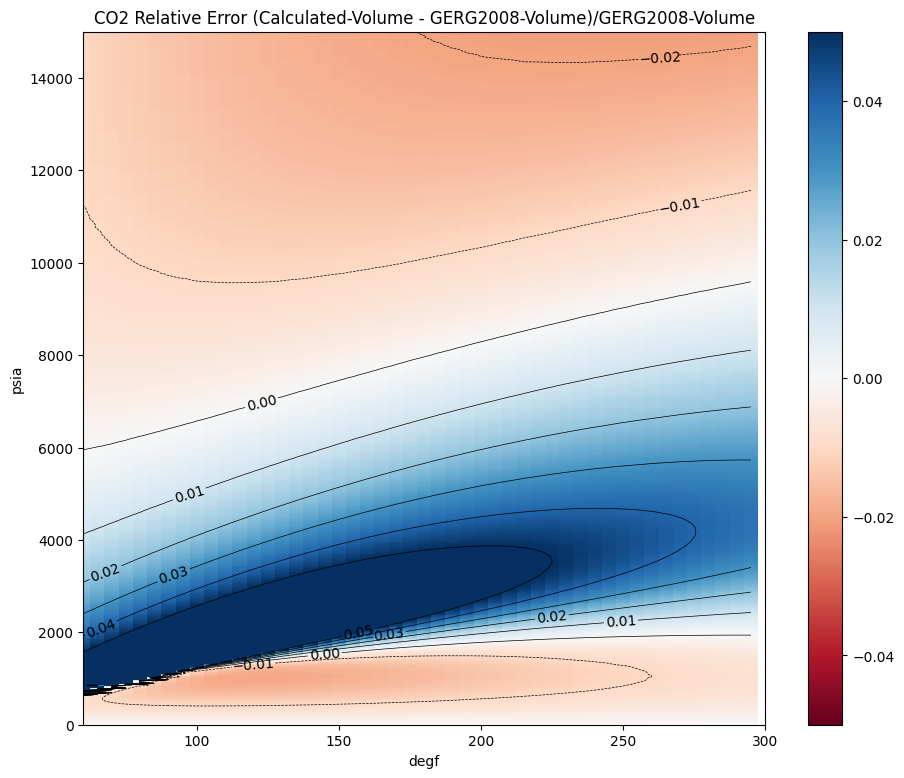

In [89]:
# Compare pure CO2
mwAir = 28.97
mwGas = 44.01
sg = mwGas/mwAir
co2, h2s, n2 = 1.0, 0.0, 0.0
df = pd.read_excel('Z-GERG_CO2.xlsx')#, sheet_name='CO2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('CO2')
molar_plots('CO2')

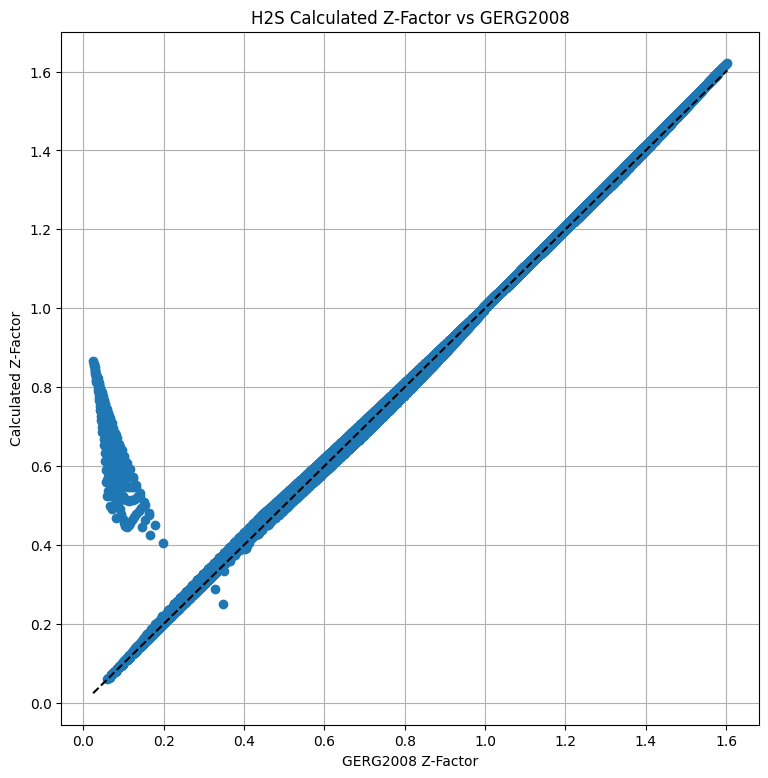

Average Relative error: 0.10041670326901128
95% of data better than error: 0.05319418853516048


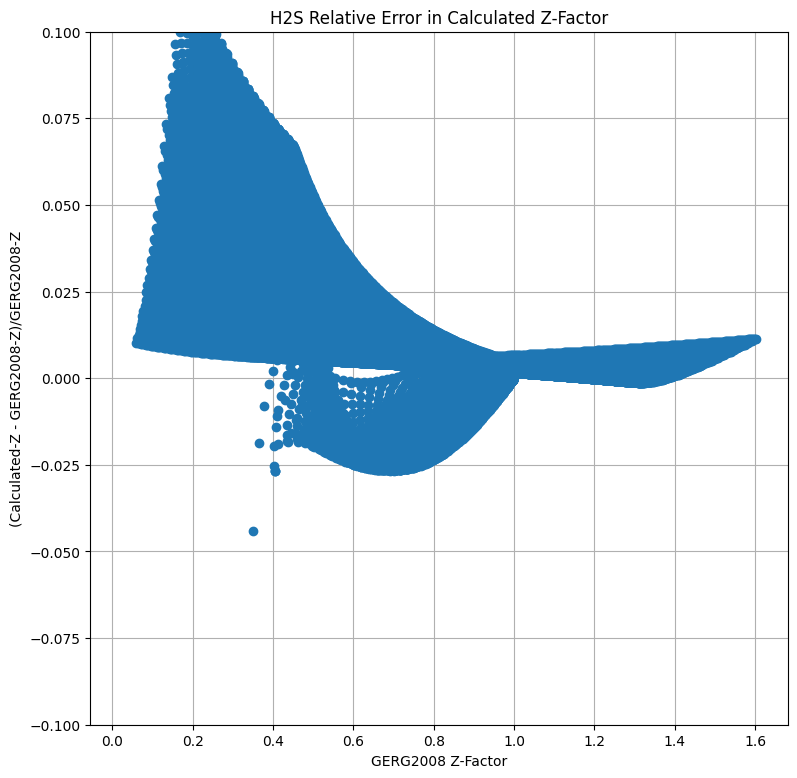

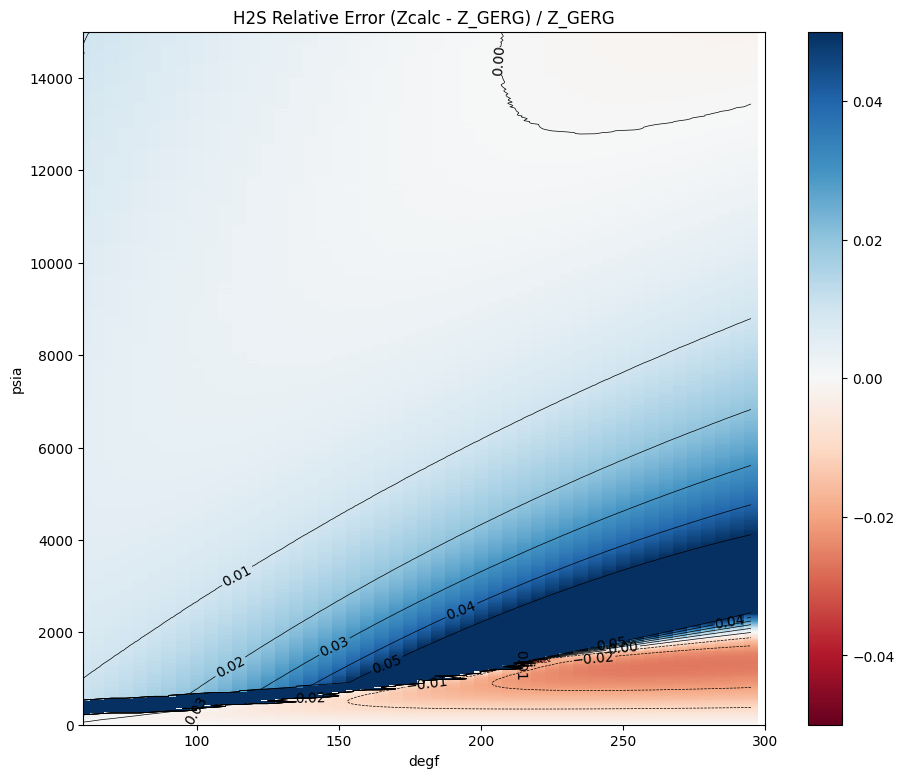

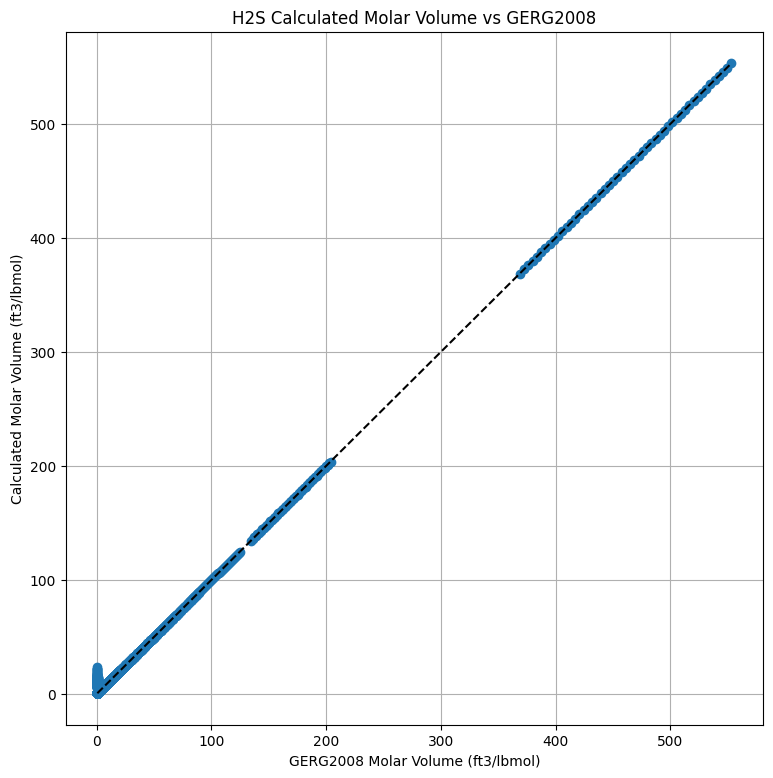

Average Relative error: 0.10041670326901128
95% of data better than error: 0.05319418853516053


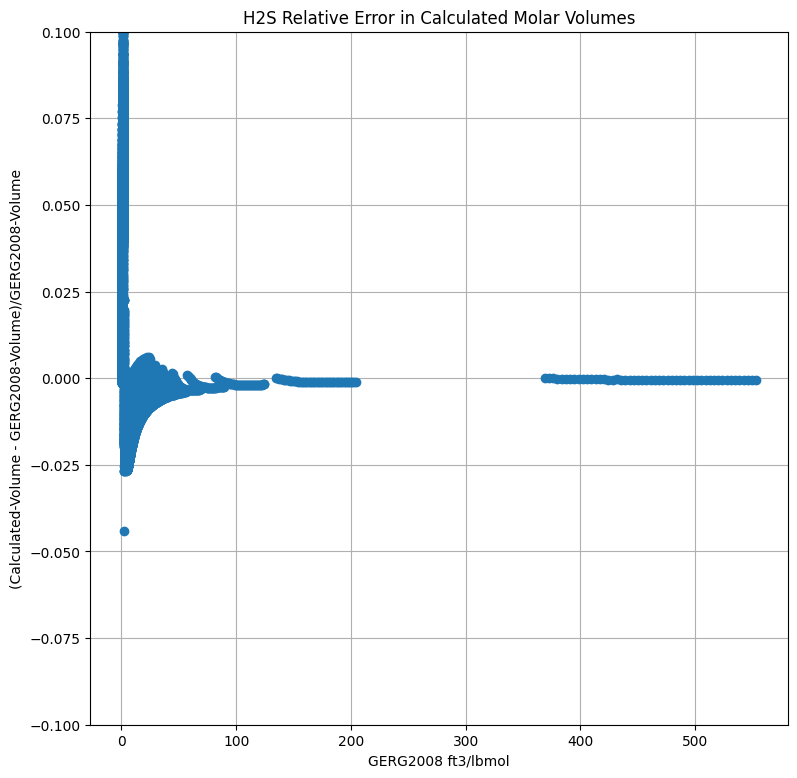

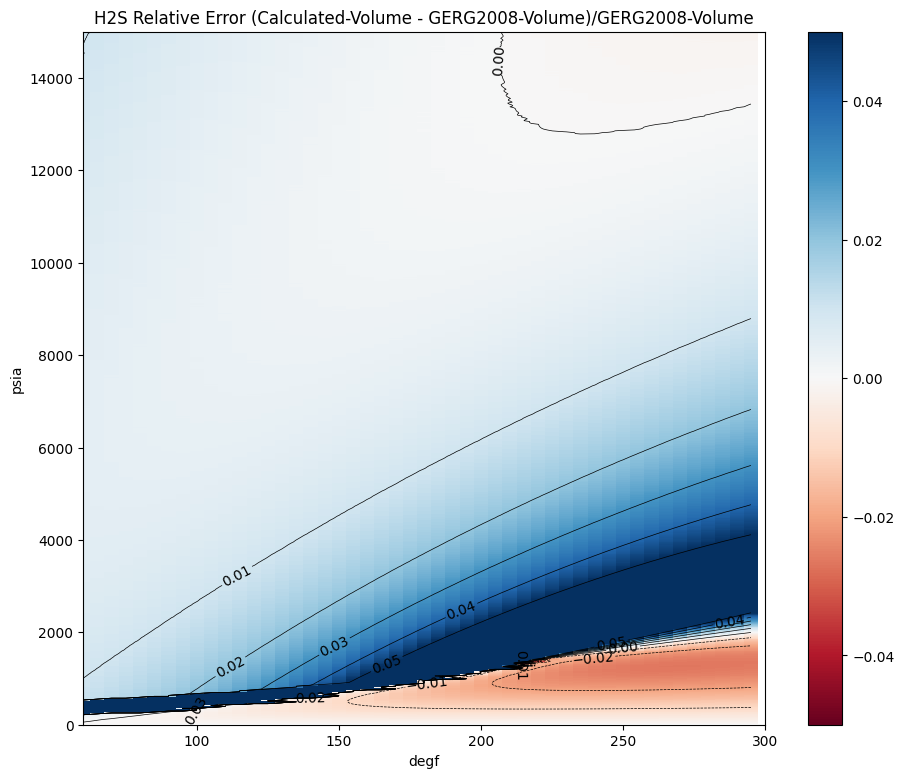

In [90]:
# Compare pure H2S
mwGas = 34.082
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 1.0, 0.0
df = pd.read_excel('Z-GERG_H2S.xlsx')#, sheet_name='H2S')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('H2S')
molar_plots('H2S')

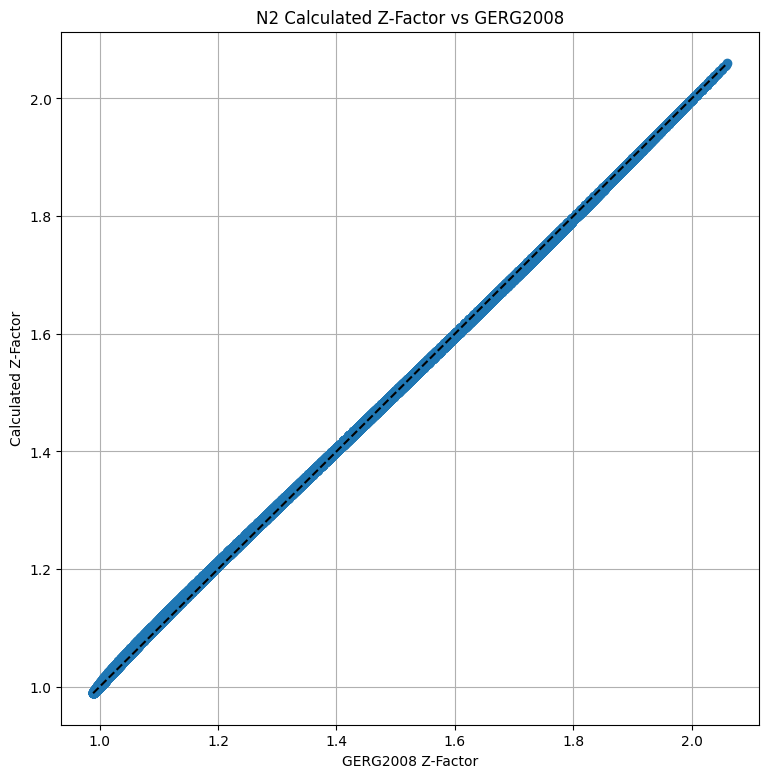

Average Relative error: 0.003741705781978691
95% of data better than error: 0.009723341629353564


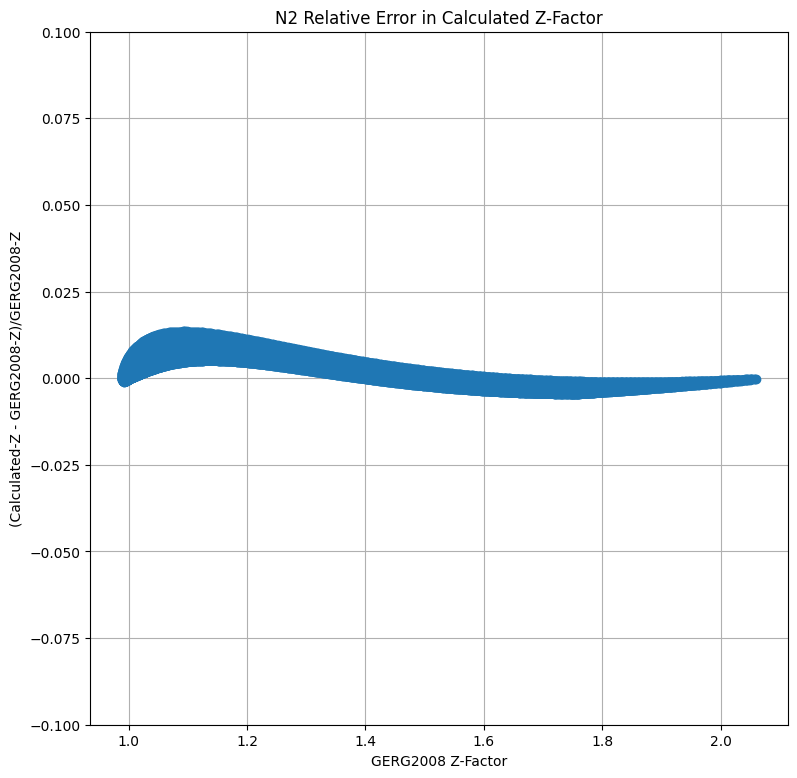

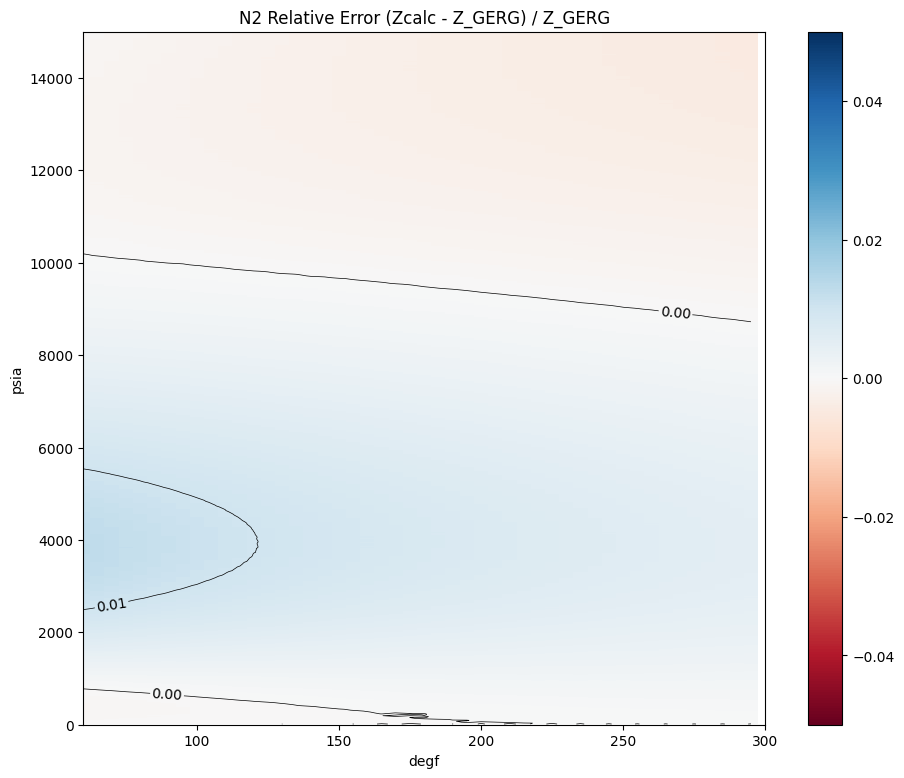

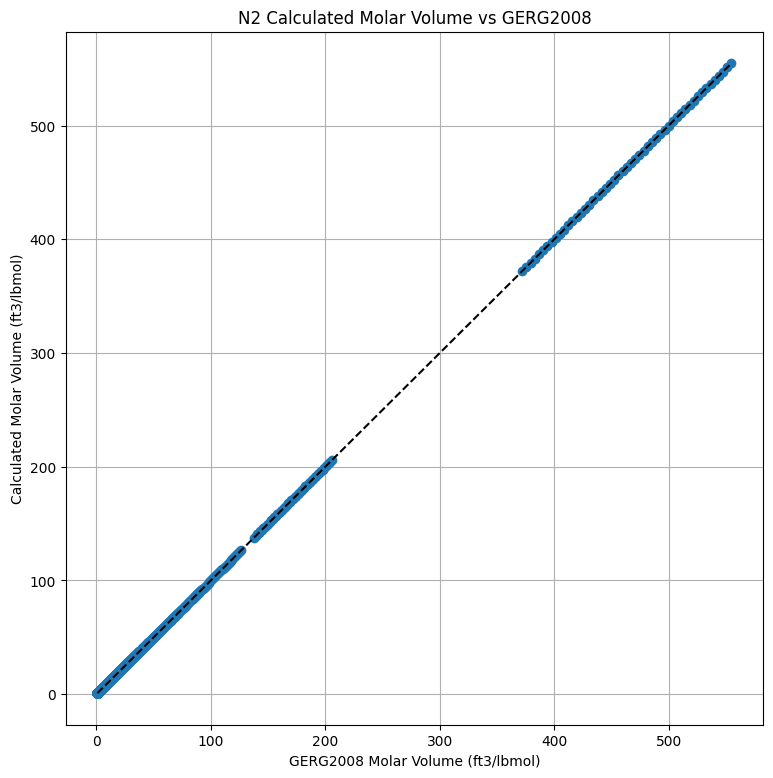

Average Relative error: 0.0037417057819786894
95% of data better than error: 0.009723341629353665


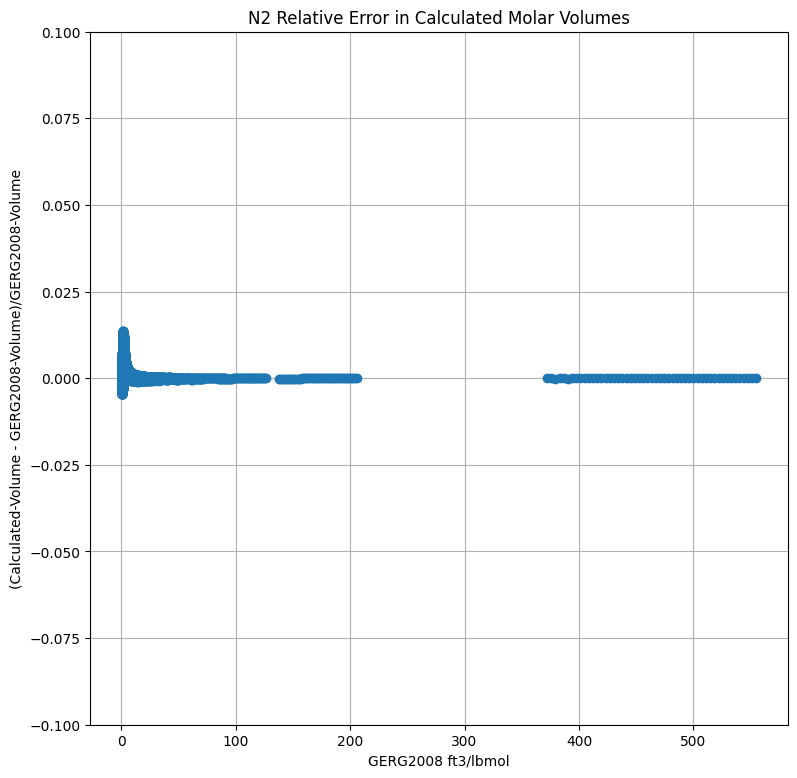

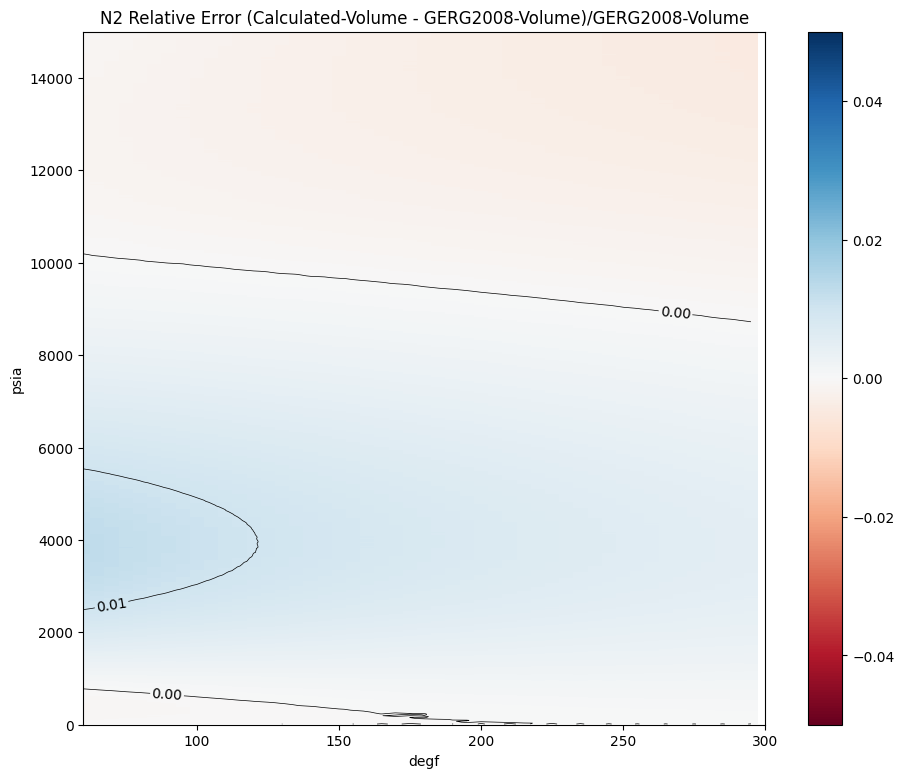

In [91]:
# Compare pure N2
mwGas = 28.014
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 0.0, 1.0
df = pd.read_excel('Z-GERG_N2.xlsx')#, sheet_name='N2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('N2')
molar_plots('N2')

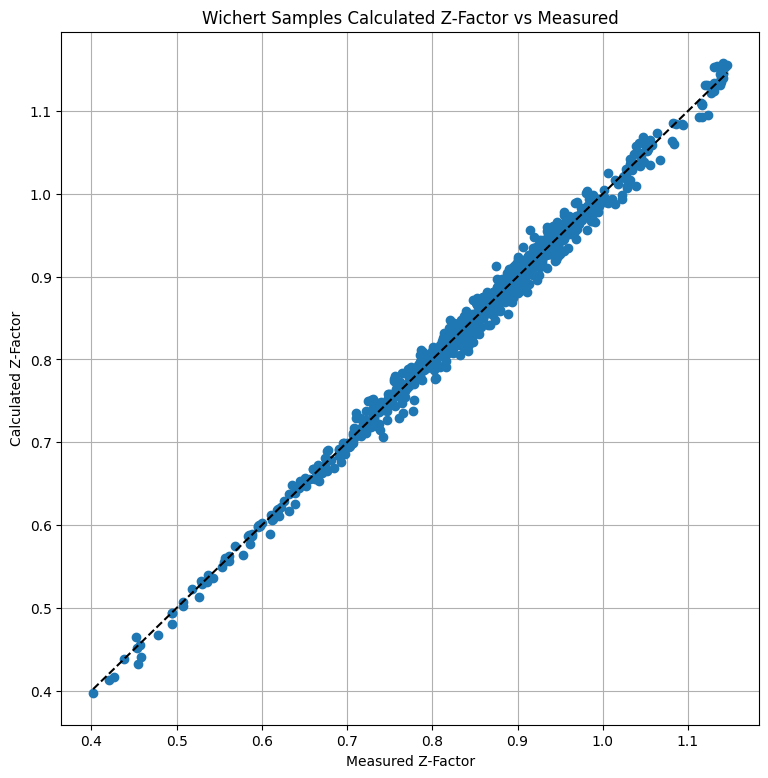

Average Relative error: 0.009135781256580123
99% of data better than error: 0.03510367008101605


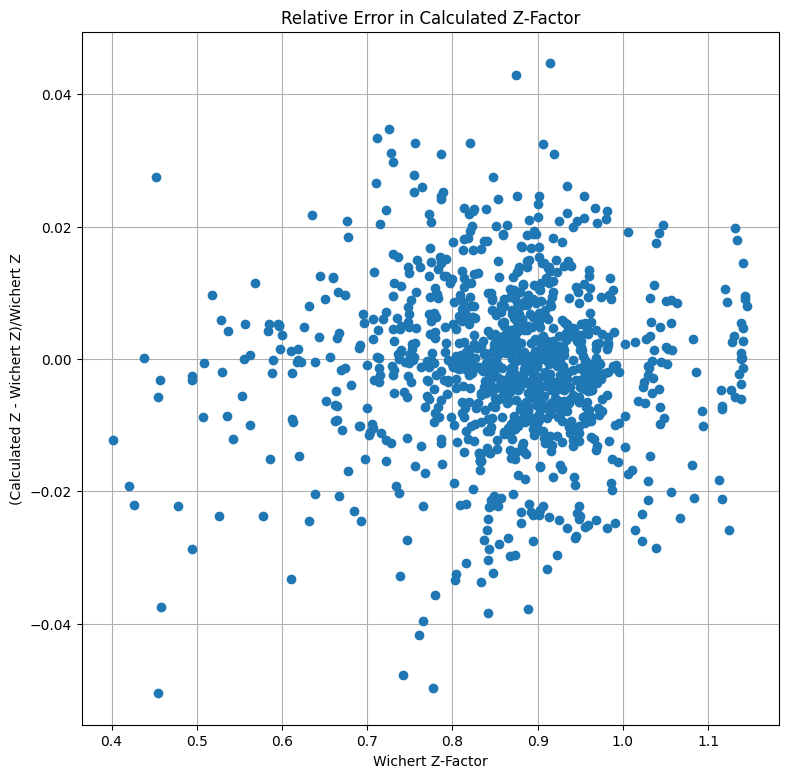

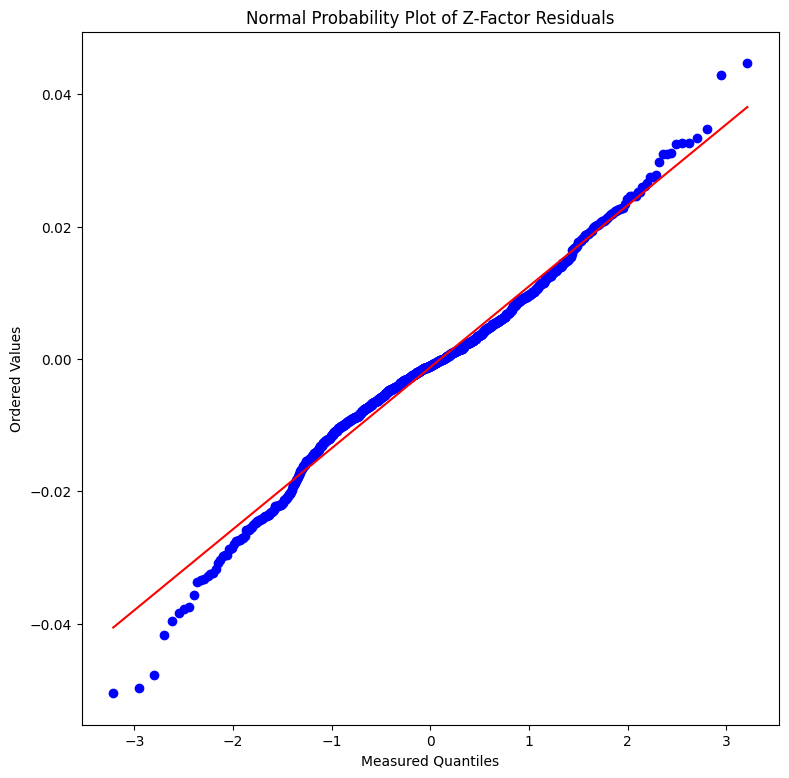

In [29]:
# Compare Wichert data
df = pd.read_excel('Wichert_data_export.xlsx')

degfs = np.array(df['degf'])
psias = np.array(df['psia'])
sgs = np.array(df['sg'])
co2s = np.array(df['co2'])
h2ss = np.array(df['h2s'])
n2s = np.array(df['n2'])
Zs = np.array(df['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)

plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('Wichert Samples Calculated Z-Factor vs Measured')
plt.xlabel('Measured Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.savefig('wichert.png')
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

errs = (calc_Zs - Zs)/Zs
plt.plot(Zs, errs, 'o')
plt.title('Relative Error in Calculated Z-Factor')
plt.xlabel('Wichert Z-Factor')
plt.ylabel('(Calculated Z - Wichert Z)/Wichert Z')
plt.grid()
plt.savefig('rel_wichert.png')
plt.show()

fig, ax = plt.subplots()
res = stats.probplot(errs, plot=ax)
ax.set_title('Normal Probability Plot of Z-Factor Residuals')
ax.set_xlabel('Measured Quantiles')
ax.set_ylabel('Ordered Values')
plt.savefig('norm_wichert.png')
plt.show()

              degf      psia       co2       h2s        n2     sg_hc  Residual
degf      1.000000  0.234101 -0.091556  0.014794  0.159696  0.398276  0.088347
psia      0.234101  1.000000 -0.087336  0.014026  0.080536  0.341707  0.126081
co2      -0.091556 -0.087336  1.000000 -0.196992 -0.073442 -0.076788 -0.006380
h2s       0.014794  0.014026 -0.196992  1.000000  0.065775 -0.157621 -0.110771
n2        0.159696  0.080536 -0.073442  0.065775  1.000000  0.333616  0.003441
sg_hc     0.398276  0.341707 -0.076788 -0.157621  0.333616  1.000000  0.032637
Residual  0.088347  0.126081 -0.006380 -0.110771  0.003441  0.032637  1.000000


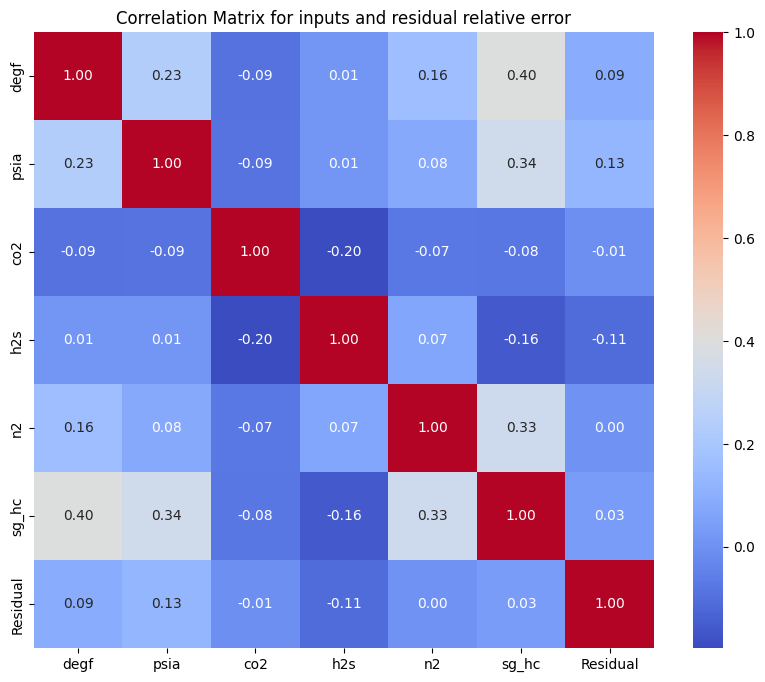

In [9]:
errs = (calc_Zs - Zs)/Zs
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error')
plt.savefig('corel_wichert.png')
plt.show()